In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/personalProject/wechatAnalytics

Mounted at /content/drive
/content/drive/MyDrive/personalProject/wechatAnalytics


In [2]:
import pandas as pd

df = pd.read_csv('chinese_dummy_wechat_data_diverse_vocab.csv')
df

,localId,TalkerId,Type,SubType,IsSender,CreateTime,Status,StrContent,StrTime,Remark,NickName,Sender
0,1,1,2,1,1,1709288580,NaN,我发现了一家很好的餐厅。,2024-03-01 10:23:00,Remark_1,Nickname_A,wxid_7o5hbu3taw45
1,2,2,2,1,0,1709260140,NaN,你喜欢什么样的花？,2024-03-01 02:29:00,Remark_2,Nickname_B,wxid_76zj3j4pafaf
2,3,1,2,1,1,1709280720,NaN,我在学习新的技能。,2024-03-01 08:12:00,Remark_3,Nickname_A,wxid_f3h282vf8ku0
3,4,2,2,1,0,1709281740,NaN,我在听古典音乐。,2024-03-01 08:29:00,Remark_4,Nickname_B,wxid_j6cz070utwqi
4,5,1,2,1,1,1709277720,NaN,我在看小说。,2024-03-01 07:22:00,Remark_5,Nickname_A,wxid_kx3ww5g0u3py
...,...,...,...,...,...,...,...,...,...,...,...,...
615,616,2,2,1,0,1714604520,NaN,我今天遇到了一些困难。,2024-05-01 23:02:00,Remark_616,Nickname_B,wxid_9exak9himqxx
616,617,1,2,1,1,1714535880,NaN,我喜欢黄色。,2024-05-01 03:58:00,Remark_617,Nickname_A,wxid_w2q4lecpuc9l
617,618,2,2,1,0,1714563360,NaN,迫不及待想见到你。,2024-05-01 11:36:00,Remark_618,Nickname_B,wxid_qhfz5tulkkje
618,619,1,2,1,1,1714570320,NaN,我在吃西餐。,2024-05-01 13:32:00,Remark_619,Nickname_A,wxid_chktihqvy95r


# Data Cleaning

include
- remove null
- remove outlier

In [3]:
df_content = df[['IsSender','StrTime','StrContent']]
print(df_content['StrContent'].isna().sum())
df_content = df_content.dropna()
df_filterd=df_content[~df_content['StrContent'].str.contains('<msg>')]
df_filterd

0


,IsSender,StrTime,StrContent
0,1,2024-03-01 10:23:00,我发现了一家很好的餐厅。
1,0,2024-03-01 02:29:00,你喜欢什么样的花？
2,1,2024-03-01 08:12:00,我在学习新的技能。
3,0,2024-03-01 08:29:00,我在听古典音乐。
4,1,2024-03-01 07:22:00,我在看小说。
...,...,...,...
615,0,2024-05-01 23:02:00,我今天遇到了一些困难。
616,1,2024-05-01 03:58:00,我喜欢黄色。
617,0,2024-05-01 11:36:00,迫不及待想见到你。
618,1,2024-05-01 13:32:00,我在吃西餐。


# Descriptive Statistic

### vocab cloud(chinese tokenization)

In [ ]:
import jieba
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

backgroud_Image = np.array(Image.open("heart2.png"))

#jieba.add_word("我爱你",freq=100000)
#jieba.add_word("爱你",freq=10000000)
#jieba.add_word("我也爱你",freq=100000)


total_text = " ".join(df_filterd['StrContent'].tolist())
words = jieba.cut(total_text)
word_counts = Counter(words)

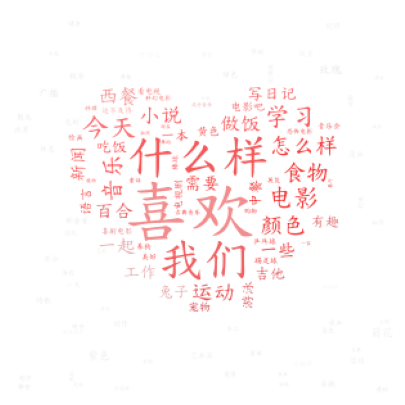

In [ ]:
# remove stopwords
#lst = ['破涕为笑','然后','我们','偷笑','宝贝','哈哈哈','嘿嘿','现在','捂脸','知道','好像','哈哈','可以','时候','加拿大','今天','明天','什么','一会','一个','如果','的话','他们','但是','准备','没有','可能','一下','还是','觉得','应该','https','就是','这个','你们','不是','这个','所以','哈哈哈哈',]
lst = ['hi']
filtered_word_freq = {word:freq for word, freq in word_counts.items() if len(word)>1 and word not in lst}

# Generate wordcloud
wordcloud = WordCloud(
    font_path='./kaiu.ttf',
    max_words=200,
    background_color='white',
    mask = backgroud_Image
  ).generate_from_frequencies(filtered_word_freq)
plt.figure(figsize=(10,5))
image_colors = ImageColorGenerator(backgroud_Image)
plt.imshow(wordcloud.recolor(color_func=image_colors))
#plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#sorted(filtered_word_freq.items(),key = lambda x: x[1],reverse=True)[:300]


### chat frequency vs. time

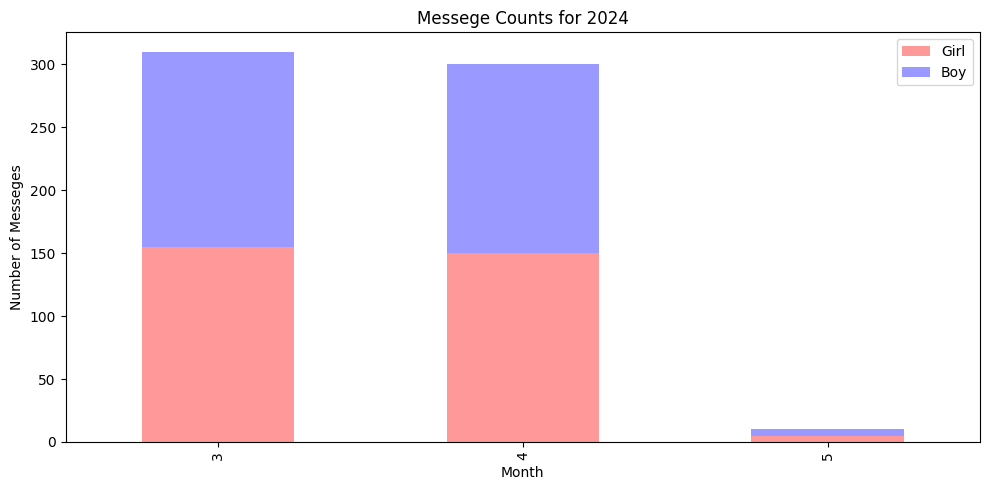

In [8]:
import matplotlib.pyplot as plt
import numpy as np

df_filterd['Time'] = pd.to_datetime(df_filterd['StrTime'])

# .unstack() method in pandas is used to pivot a level of the index labels from a Series or DataFrame
'''
s
one  a   1.0
     b   2.0
two  a   3.0
     b   4.0
dtype: float64
s.unstack(level=-1)
     a   b
one  1.0  2.0
two  3.0  4.0
'''
grouped = df_filterd.groupby([df_filterd['Time'].dt.year, df_filterd['Time'].dt.month,'IsSender']).size().unstack(fill_value=0)

years = df_filterd['Time'].dt.year.unique()

fig,axes = plt.subplots(nrows=len(years),figsize = (10,5*len(years)))

if not isinstance(axes, np.ndarray):
  axes = [axes]

"""
axes variable in a Matplotlib plot represents the individual plots or subplots within a figure.
Each ax in axes is used to control the specific aspects of each subplot
"""
for ax, year, in zip(axes, years):
  # select rows containing year
  data_for_year = grouped.loc[year]
  data_for_year.plot(kind='bar', ax=ax, stacked=True, color=['#FF9999', '#9999FF'])
  ax.set_title(f'Messege Counts for {year}')
  ax.set_xlabel('Month')
  ax.set_ylabel('Number of Messeges')
  ax.legend(['Girl','Boy'])

plt.tight_layout()
plt.show()

### average chat frequncy within a day

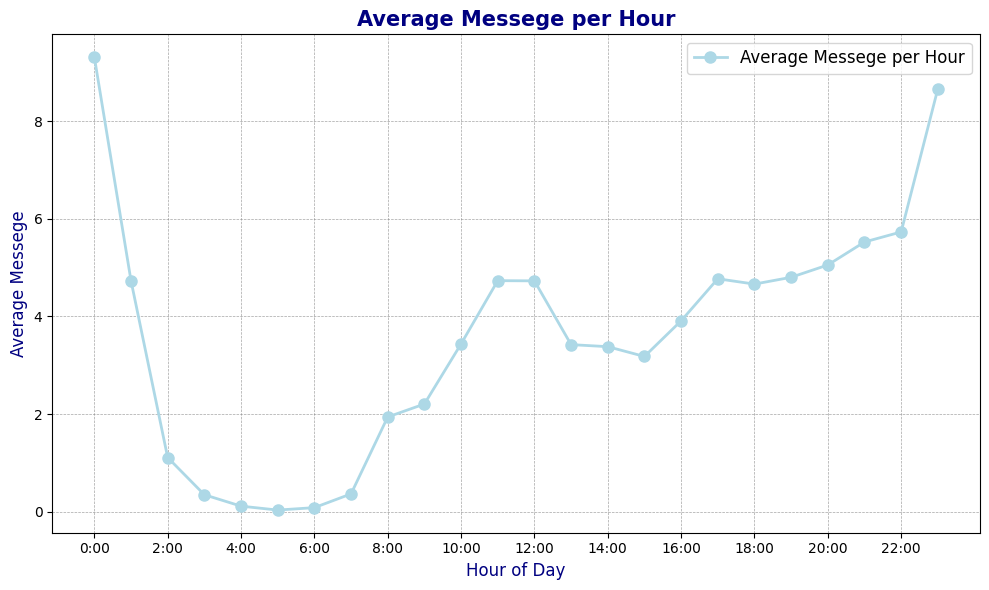

In [ ]:
hourly_count = df_filterd.groupby(df_filterd['Time'].dt.hour).size()
hourly_count

# average per hour
total_days = df_filterd['Time'].dt.date.nunique()
hourly_avg = hourly_count/total_days
hourly_avg

# create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(hourly_avg.index, hourly_avg.values, linestyle = "-", marker = 'o', color = 'lightblue', markersize = 8, linewidth = 2, label = "Average Messege per Hour")

ax.set_title('Average Messege per Hour',fontsize = 15, fontweight = 'bold',color = 'navy')
ax.set_xlabel('Hour of Day',color = 'navy', fontsize = 12)
ax.set_ylabel('Average Messege',color = 'navy', fontsize = 12)
ax.set_xticks(range(0,24,2))
ax.set_xticklabels([f"{i}:00" for i in range(0,24,2)])
ax.grid(True, which='both',linestyle = '--',linewidth = 0.5, color = 'gray', alpha = 0.7)
ax.legend(fontsize = 12)

plt.tight_layout()
plt.show()

# Sentiment Analysis

In [4]:
from transformers import pipeline

df_test = df_filterd[df_filterd['StrTime'].str.contains('2024')]
df_test['Time'] = pd.to_datetime(df_test['StrTime'])

classifier = pipeline('sentiment-analysis',model="liam168/c2-roberta-base-finetuned-dianping-chinese")

def analyse_sentiment(text):
  results = classifier(text)
  label = results[0]['label']
  score = results[0]['score']
  return label, score

df_test['Sentiment'],df_test['score'] = zip(*df_test['StrContent'].apply(analyse_sentiment))
#df_test

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/854 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/377 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [5]:
df_test['Sentiment_value'] = df_test.apply(lambda x: x['score'] if x['Sentiment'] == "positive" else -x['score'], axis=1)
df_test
daily_sentiment = df_test.groupby(df_test['Time'].dt.date)['Sentiment_value'].mean()
daily_sentiment

Time
2024-03-01    0.990165
2024-03-02    0.593537
2024-03-03    0.795088
2024-03-04    0.990749
2024-03-05    0.990898
                ...   
2024-04-27    0.990515
2024-04-28    0.990832
2024-04-29    0.989903
2024-04-30    0.596323
2024-05-01    0.593918
Name: Sentiment_value, Length: 62, dtype: float64

# Interactive Dashboard

In [6]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.7 MB/s eta 0:00:00


In [14]:
import numpy as np
import pandas as pd
import calendar
import plotly.graph_objects as go
from dash import Dash, html, dcc, Input, Output, callback
import webbrowser
from threading import Timer
from google.colab import output


#daily_sentiment = pd.Series(data)
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)

def create_heatmap_data(series, year, month):
  start_date = pd.Timestamp(year=year, month=month, day=1)
  #print(start_date)
  end_date = start_date + pd.offsets.MonthEnd()

  month_data = series[start_date:end_date]
  #print(month_data)
  # return first week days(0~6), and total days for that month (28~31)
  month_range = calendar.monthrange(year,month)

  # initialize data with 6 weeks and 7 days per week
  data = np.full((6,7),np.nan)
  text_data = np.full((6,7),"",dtype=object)
  #print(data)
  for date, sentiment in month_data.items():
    # date.day print out the day in int
    # divmod returns: quotient,divident
    week,day = divmod((date.day-1+month_range[0]),7)
    #print(week,day)
    data[week,day] = sentiment
    text_data[week,day] = date.strftime('%Y-%m-%d')
  #print(data)
  return data,text_data

def plot_calendar_heatmap(data, text_data, year, month):
  '''
  The code snippet creates a heatmap using Plotly's `go.Figure` and `go.Heatmap`:

- **`z`**: A 2D list containing the data points to be displayed in the heatmap.
- **`x`**: Specifies the labels along the x-axis, using abbreviated weekday names (e.g., Mon, Tue, etc.).
- **`y`**: Labels for the y-axis, representing six weeks.
- **`hoverongaps`**: When set to False, hovering over gaps in the data will not display any hover text.
- **`colorscale`**: 'RdBu' is a color scale ranging from Red to Blue, useful for showing a gradient from negative to positive values.
- **`zmin` and `zmax`**: These set the minimum and maximum values for the color scale, ensuring that the colors represent values between -1 and 1.
  '''
  z = data
  fig = go.Figure(
      data=go.Heatmap(
          z= z,
          x = list(calendar.day_abbr),
          y = ['Week1','Week2','Week3','Week4','Week5','Week6'],
          text = text_data, # Assign text data to each cell
          hoverinfo = 'text+z',
          hoverongaps = False,
          colorscale = 'RdBu',
          zmin=-1,
          zmax=1
      )
  )
  fig.update_layout(
      title=f'Sentiment Calendar for {calendar.month_name[month]} {year}',
      #xaxis_nticks = 36

  )
  fig.update_yaxes(autorange="reversed")

  return fig

app = Dash(__name__)

years = [2024]
months = {i:calendar.month_name[i] for i in range(1,13)}

app.layout = html.Div([
    html.H1(children='Sentiment Calendar Dashboard'),

    dcc.Dropdown(
        id = "year-dropdown",
        options = [{'label':str(year),'value':year} for year in years],
        value = years[0]
    ),
    dcc.Dropdown(
        id = 'month-dropdown',
        options = [{'label':name,'value':num} for num,name in months.items()],
        value = 1
    ),
    # dcc for interactive component
    dcc.Graph(
        id='calendar-heatmap',
    ),
    html.Div(id='chat-history',style={
        'white-space': 'pre-line',
        'font-family': 'sans-serif',
        'padding': '10px',
        'max-height':'300px',
        'overflow-y':'auto',
        'border': '1px solid #ddd',
        'margin':'10px 0'
        })

])

@app.callback(
    [Output('calendar-heatmap', 'figure'),
     Output('chat-history', 'children')],
    [   Input('year-dropdown', 'value'),
        Input('month-dropdown', 'value'),
        Input('calendar-heatmap', 'clickData'),
     ]
)
def update_output(year,month,clickData):
  #year, month = 2024,3
  heatmap_data,text_data = create_heatmap_data(daily_sentiment,year,month)
  fig = plot_calendar_heatmap(heatmap_data,text_data,year,month)

  chat_history_layout = "Click on a day to see messages."
  '''
  {
  "points": [
    {
      "curveNumber": 0,
      "x": "Tue",
      "y": "Week3",
      "z": 0.495983,
      "bbox": {
        "x0": 198.29000000000002,
        "x1": 308.57,
        "y0": 314,
        "y1": 359
      }
    }
  ]
}
  '''
  if clickData:
    # .zfill(2) pad string to length of 2 with 0
    date_clicked = clickData['points'][0]['text']
    mask = (df_test['Time'].dt.strftime('%Y-%m-%d')==date_clicked)
    filtered_chats = df_test[mask]
    #chat_history = clickData

    if not filtered_chats.empty:
      chat_history_layout = [html.Div([
          html.P(f"{row['Time'].strftime('%H:%M:%S')} - {'Boy' if row['IsSender'] == 1 else 'Girl'}: {row['StrContent']}",
                  style={'color': '#0074D9' if row['IsSender'] == 1 else '#FF4136'})
          for index, row in filtered_chats.iterrows()
      ])]
    else:
      chat_history_layout = f"No messages on {date_clicked}."

  return fig, chat_history_layout


if __name__=='__main__':
  #Timer(1, open_browser).start()  # Wait 1 second before opening the URL
  #app.run_server(debug=True)
  app.run_server(mode='inline', host='localhost', port=1050)


<IPython.core.display.Javascript object>

# Topic Modeling

Include
- text data processing
- llama2 model from huggingface

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer

model_path = "LinkSoul/Chinese-Llama-2-7b"

tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=False)
model = AutoModelForCausalLM.from_pretrained(model_path).half().cuda()
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)



tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00003.bin:   0%|          | 0.00/9.88G [00:00<?, ?B/s]

pytorch_model-00002-of-00003.bin:   0%|          | 0.00/9.89G [00:00<?, ?B/s]

pytorch_model-00003-of-00003.bin:   0%|          | 0.00/7.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [15]:
import numpy as np

df_test = df_filterd[df_filterd['StrTime'].str.contains('2024-03-18')]
df_test
#merged_txt = ".".join(df_test['StrContent'].tolist())
#df_test['formatted'] = np.where()

# array of size len(df_test)
merged_txt = "\n".join(np.where(df_test['IsSender']==1,'Boy: ', 'Girl: ') + df_test['StrContent'])
print(merged_txt)

Boy: 我喜欢钢琴。
Girl: 我喜欢菊花。
Boy: 我们去看郁金香吧。
Girl: 你的工作怎么样？
Boy: 我们去看恐怖电影吧。
Girl: 我累了，需要休息。
Boy: 我在踢足球。
Girl: 你喜欢什么样的颜色？
Boy: 我们去听小提琴吧。
Girl: 我在做饭。


In [ ]:
instruction = """[INST] <<SYS>作为一个总结我们每日情感支持对话的朋友，请提供一句话的总结来捕捉对话的精髓，包括重要的话题，然后附上一段简短的个人评论以增添温暖。请保持总结的内容既可爱又个性化。例如，如果今天你们互相鼓励，为一个重要的演讲做准备，你的总结可能是：“今天我们全力以赴为大演讲做准备——团队合作让梦想成真！看到你们的互动总是很鼓舞人心。” \n<</SYS>>\n\n{} [/INST]"""

prompt = instruction.format(merged_txt)
generate_ids = model.generate(tokenizer(prompt, return_tensors='pt',truncation=True, max_length=4096).input_ids.cuda(), max_new_tokens=256, streamer=streamer)

总结：今天我们的对话充满了爱和支持，我们一起准备重要的演讲，并且互相鼓励。我们也讨论了一些有趣的话题，比如赌博和刮刮乐。我们的对话充满了温暖和个性化，让我们感到快乐和满足。 
